In [1]:
# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# Load dataset
df = pd.read_csv('/Users/cstat_nasa_mosaics/Desktop/Data_Science_HomeWork/Used_DataSet/Salary_Data.csv')
print(df.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [2]:
print(df.shape)


(30, 2)


# The dataset contains 30 observations and 2 variables: Years of experience and Salary.

In [3]:
import pandas as pd

df = pd.read_csv('/Users/cstat_nasa_mosaics/Desktop/Data_Science_HomeWork/Used_DataSet/Salary_Data.csv')

In [4]:
print (df.describe())

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


# The average years of experience is 5.3 years, with a minimum of 1.1 and a maximum of 10.5 years. The average salary is USD 76,003, ranging from USD 37,731 to USD 122,391. The standard deviation of USD 27,414 suggests significant variation in salaries across employees.

In [5]:
print(df.isnull().sum())

YearsExperience    0
Salary             0
dtype: int64


# There are no missing values in the dataset. 
# The data is clean and ready for analysis.

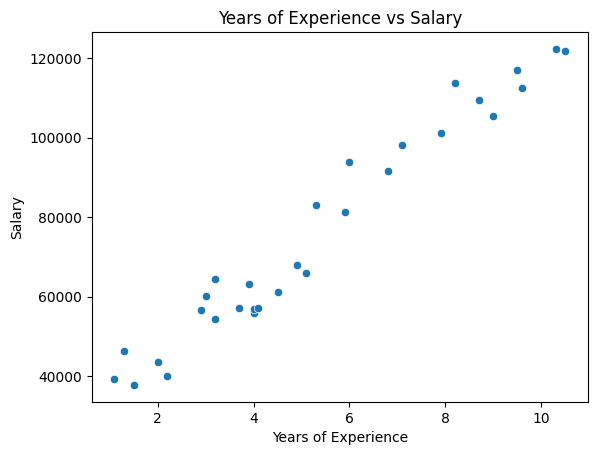

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# The scatter plot shows a strong positive linear relationship, between years of experience and salary. As experience increases, salary consistently increases. The data points follow a clear upward trend with no significant outliers, suggesting that linear regression will be a good fit for this data.

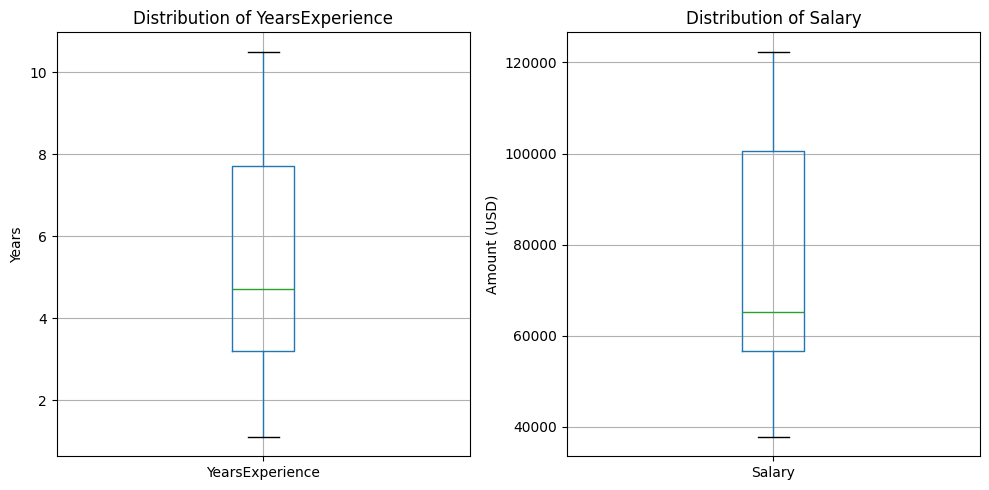

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 1.Uploaded dataset
df = pd.read_csv('/Users/cstat_nasa_mosaics/Desktop/Data_Science_HomeWork/Used_DataSet/Salary_Data.csv')

# 2. Set up the matplotlib figure with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# 3. Plot YearsExperience on the first subplot (axes[0])
df.boxplot(column=['YearsExperience'], ax=axes[0])
axes[0].set_title('Distribution of YearsExperience')
axes[0].set_ylabel('Years')

# 4. Plot Salary on the second subplot (axes[1])
df.boxplot(column=['Salary'], ax=axes[1])
axes[1].set_title('Distribution of Salary')
axes[1].set_ylabel('Amount (USD)')

# 5. Adjust layout so titles and labels don't overlap, then save
plt.tight_layout()
plt.savefig('fixed_boxplots.png')

# The box plots show that the median experience is 4.7 years and the median salary is 65,000 USD. The middle 50% of employees have between 3.2 and 7.7 years of experience and earn between 57,000 and 100,000 USD. There are no outliers in either variable, confirming the data is clean and consistent.

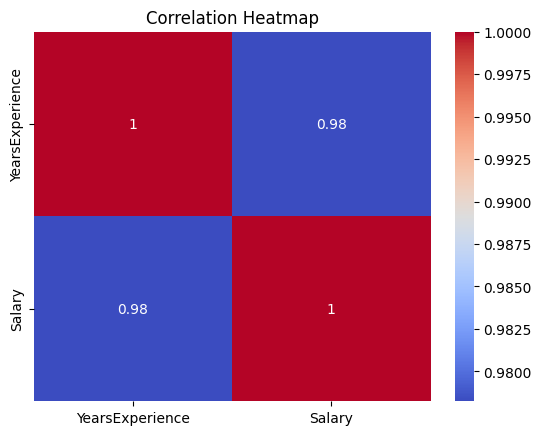

In [8]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



# The correlation heatmap shows a correlation of 0.98 between years of experience and Salary. This is an extremely strong positive relationship, meaning that as experience increases, salary increases almost perfectly. This confirms that linear regression will be an excellent model for this dataset.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X = df[['YearsExperience']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'Intercept: {model.intercept_:.2f}')
print(f'Slope: {model.coef_[0]:.2f}')
print(f'R²: {r2_score(y_test, y_pred):.4f}')
print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')

Intercept: 25321.58
Slope: 9423.82
R²: 0.9024
MSE: 49830096.86
RMSE: 7059.04


# The linear regression model shows that for every additional year of experience, salary increases by USD 9,423. The R² of 0.90 means the model explains 90% of salary variation. The RMSE of USD 7,059 means predictions are off by USD 7,059 on average, which is acceptable given the salary range.

In [10]:
from sklearn.preprocessing import PolynomialFeatures

for degree in [2, 3, 4]:
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    
    model_poly = LinearRegression()
    model_poly.fit(X_poly_train, y_train)
    y_pred_poly = model_poly.predict(X_poly_test)
    
    r2 = r2_score(y_test, y_pred_poly)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly))
    print(f'Degree {degree} → R²: {r2:.4f}, RMSE: {rmse:.2f}')

Degree 2 → R²: 0.8972, RMSE: 7247.61
Degree 3 → R²: 0.9048, RMSE: 6971.79
Degree 4 → R²: 0.9030, RMSE: 7039.73


# Comparing all models, linear regression performs best overall. While degree 3 shows a marginally better RMSE of 6,971 vs 7,059, the difference is insignificant. Since the scatter plot already showed a linear relationship and adding complexity did not meaningfully improve predictions, the simple linear regression model is the best choice for this dataset.